In [58]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns

In [23]:
credit_card_data = pd.read_csv("credit_card_clients.csv", header=1)

In [10]:
credit_card_data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [27]:
#selecionar colunas de interesse
attributes = [1,2,3,4,5]
X_data = credit_card_data.iloc[:,attributes].values

In [28]:
credit_card_data.columns[attributes]

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE'], dtype='object')

In [33]:
X_data

array([[ 20000,      2,      2,      1,     24],
       [120000,      2,      2,      2,     26],
       [ 90000,      2,      2,      2,     34],
       ...,
       [ 30000,      1,      2,      2,     37],
       [ 80000,      1,      3,      1,     41],
       [ 50000,      1,      2,      1,     46]], dtype=int64)

In [35]:
#Padronização dos dados:
scaler = StandardScaler()
X_data = scaler.fit_transform(X_data)
X_data

array([[-1.13672015,  0.81016074,  0.18582826, -1.05729503, -1.24601985],
       [-0.3659805 ,  0.81016074,  0.18582826,  0.85855728, -1.02904717],
       [-0.59720239,  0.81016074,  0.18582826,  0.85855728, -0.16115646],
       ...,
       [-1.05964618, -1.23432296,  0.18582826,  0.85855728,  0.16430256],
       [-0.67427636, -1.23432296,  1.45111372, -1.05729503,  0.59824792],
       [-0.90549825, -1.23432296,  0.18582826, -1.05729503,  1.14067961]])

Descobrindo o número ideal de clusters: iteração com diferentes números (range 1-10) e plotagem do gráfico WCSS x N clusters:

In [49]:
wcss_values = []
n_clusters = range(1,11)
for i in n_clusters:
    kmeans_data = KMeans(n_clusters=i, random_state=0)
    kmeans_data.fit(X_data)
    wcss_values.append(kmeans_data.inertia_)

<AxesSubplot:>

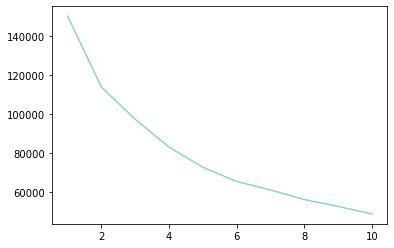

In [90]:
sns.lineplot(x=n_clusters, y=wcss_values)

Previsão dos grupos com o número ideal de clusters: 4

In [81]:
kmeans_data = KMeans(n_clusters=4, random_state=0)
labels = kmeans_data.fit_predict(X_data)

In [82]:
labels

array([1, 0, 0, ..., 3, 2, 2])

Como temos 5 atributos, a visualização dos dados em gráfico 5D seria muito pouco interessante. Por isso, vamos reduzir a dimensionalidade dos dados com a técnica PCA. Criaremos novas 2 variáveis que sejam representativas do conjunto  e geraremos a plotagem usando esses valores para X e y:

In [83]:
pca = PCA(n_components=2)
X_data_pca = pca.fit_transform(X_data)

In [84]:
X_data_pca.shape

(30000, 2)

In [85]:
X_data_pca

array([[-0.34571691, -0.96788004],
       [-1.2955575 , -0.49177973],
       [-0.75633048, -0.60869063],
       ...,
       [-0.49930886, -0.97985253],
       [ 1.49816174, -1.39169529],
       [ 1.41464551, -0.69175962]])

<AxesSubplot:>

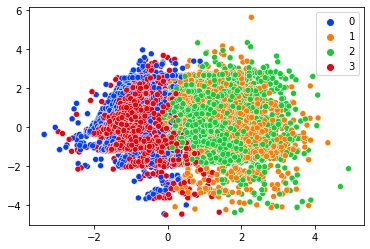

In [86]:
sns.scatterplot(x=X_data_pca[:,0], y=X_data_pca[:,1], hue=labels, palette="bright")